In [1]:
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import os
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
basepath = 'C:/Users/roseh/Desktop/NYBG_R/'
file_location = 'data/processed/QC2'
os.chdir(os.path.join(basepath, file_location))

#### Create Regression Plots for NYBG data - co2 flux vs. soil temp and co2 flux vs. chamber temp

In [4]:
df = pd.read_csv('NYBG_CO2_Flux_and_Temps.csv')
df.drop(22,axis=0,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
grouped = df.groupby('Collar')

In [8]:
bw_tp1 = grouped.get_group('BW_TP1')

In [16]:
bw_hl1 = grouped.get_group('BW_HL1')

In [6]:
df.head()

,Date,Chamber_Temp,Collar,CO2_Flux,Site,Type,Chamber Used,Temperature,Moisture
0,5/31/2022 8:13,31.95000,BW_TP1,33.04108,BW,TP,R,23.1,38.0
1,5/31/2022 8:17,31.07364,BW_TP2,21.48947,BW,TP,R,23.4,38.0
2,5/31/2022 8:22,32.25500,BW_TP3,15.38946,BW,TP,R,23.6,51.1
3,5/31/2022 8:55,30.45091,BR_HL3,22.07139,BR,HL,R,22.3,47.1
4,5/31/2022 9:49,33.74273,BW_HL1,24.25844,BW,HL,R,23.0,32.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 175
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          175 non-null    object 
 1   Chamber_Temp  175 non-null    float64
 2   Collar        175 non-null    object 
 3   CO2_Flux      175 non-null    float64
 4   Site          175 non-null    object 
 5   Type          175 non-null    object 
 6   Chamber Used  175 non-null    object 
 7   Temperature   171 non-null    float64
 8   Moisture      172 non-null    float64
dtypes: float64(4), object(5)
memory usage: 13.7+ KB


In [75]:
def regression_soil_temp(group):
    y, X = dmatrices('CO2_Flux ~ Temperature', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Temperature'], result.fittedvalues, 'red')
    ax.set_title(f'Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}_soil_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

In [79]:
def regression_chamber_temp(group):
    y, X = dmatrices('CO2_Flux ~ Chamber_Temp', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Chamber_Temp'], result.fittedvalues, 'red')
    ax.set_title(f'Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}_chamber_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

In [ ]:
#for group in grouped:
    #regression_chamber_temp(group)

In [26]:
result = model.fit()

In [27]:
b_coef, m_coef = result.params
b_err, m_err = result.bse
print(f'Regression slope: m = {m_coef:.3f} +/- {m_err:.3f}')
print(f'Regression intercept: b = {b_coef:.3f} +/- {b_err:.3f}')
print(f'Regression R-squared: R^2 = {result.rsquared:.3f}')
print(f'Regression p-value: p(>|t|) = {result.pvalues[1]:.2e}')

Regression slope: m = 0.789 +/- 1.089
Regression intercept: b = 3.813 +/- 27.562
Regression R-squared: R^2 = 0.070
Regression p-value: p(>|t|) = 4.92e-01


In [30]:
def plot_regression(df, result):
    fig,ax = plt.subplots(figsize=(8,6))
    ax.plot(df['Soil_Temp'],df['CO2_Flux'],'o')
    ax.plot(df['Soil_Temp'],result.fittedvalues, "r--.")

#### Plot regression for 7810 and 8100 measurements separately

In [24]:
df_7810 = pd.read_csv('7810_NYBG.csv')
df_7810.drop('Unnamed: 0',axis=1, inplace=True)

In [44]:
df_8100 = pd.read_csv('8100_NYBG.csv')
df_8100.drop('Unnamed: 0',axis=1, inplace=True)

In [45]:
df_8100.head()

,Date,Chamber_Temp,Collar,CO2_Flux,Site,Type,Chamber Used,Soil_Temp,Soil Moisture
0,5/31/2022 8:13,31.95000,BW_TP1,33.04108,BW,TP,R,23.1,38.0
1,5/31/2022 8:17,31.07364,BW_TP2,21.48947,BW,TP,R,23.4,38.0
2,5/31/2022 8:22,32.25500,BW_TP3,15.38946,BW,TP,R,23.6,51.1
3,5/31/2022 8:55,30.45091,BR_HL3,22.07139,BR,HL,R,22.3,47.1
4,5/31/2022 9:49,33.74273,BW_HL1,24.25844,BW,HL,R,23.0,32.3


In [35]:
def regression_soil_temp_7810(group):
    y, X = dmatrices('CO2_Flux ~ Soil_Temp', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Soil_Temp'], result.fittedvalues, 'red')
    ax.get_lines()[0].set_markerfacecolor('g')
    ax.get_lines()[0].set_markeredgecolor('g')
    ax.set_title(f'7810. Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}7810_soil_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

In [54]:
def regression_soil_temp_8100(group):
    y, X = dmatrices('CO2_Flux ~ Soil_Temp', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Soil_Temp'], result.fittedvalues, 'red')
    ax.get_lines()[0].set_markerfacecolor('purple')
    ax.get_lines()[0].set_markeredgecolor('purple')
    ax.set_title(f'8100. Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}8100_soil_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

In [38]:
def regression_chamber_temp_8100(group):
    y, X = dmatrices('CO2_Flux ~ Chamber_Temp', data=group[1], return_type='dataframe')
    model = sm.OLS(y, X)
    result = model.fit()
    
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(result, 1, ax=ax, vlines=False)
    ax.plot(X['Chamber_Temp'], result.fittedvalues, 'red')
    ax.get_lines()[0].set_markerfacecolor('g')
    ax.get_lines()[0].set_markeredgecolor('g')
    ax.set_title(f'8100. Collar: {group[0]}      r-squared:{np.around(result.rsquared,4)}')
    ax.legend(['Observed','Fitted'])
    
    filepath = 'C:/Users/roseh/Desktop/NYBG_R/data/processed/QC2/plots/regression_plots'
    filename = '{}8100_chamber_temp_regression.png'.format(group[0])
    plt.savefig(os.path.join(filepath,filename))
    

    plt.show()

In [74]:
grouped = df_7810.groupby('Collar')

In [ ]:
for group in grouped:
    regression_soil_temp_7810(group)

In [50]:
grouped2 = df_8100.groupby('Type')

In [ ]:
for group in grouped2:
    regression_soil_temp_8100(group)

#### Time series plot

In [85]:
df_7810['Date'] = pd.to_datetime(df_7810['Date'])

In [86]:
df_7810['day'] = df_7810['Date'].dt.date

In [87]:
df_7810.head()

,Chamber_Temp,CO2_Flux,Collar,Date,Site,Type,Chamber Used,Soil_Temp,Soil Moisture,day
0,24.40253,18.37848,BR_HL4,2022-07-01 08:01:00,BR,HL,R,22.9,57.4,2022-07-01
1,24.33798,19.30210,BR_HL3,2022-07-01 08:06:00,BR,HL,R,23.4,46.5,2022-07-01
2,28.40231,5.90584,BE_SV3,2022-07-01 08:36:00,BE,SV,R,21.5,34.6,2022-07-01
3,26.27136,8.86818,BE_UL2,2022-07-01 08:45:00,BE,UL,R,22.6,37.4,2022-07-01
4,26.03414,9.84708,BE_UL1,2022-07-01 08:50:00,BE,UL,R,21.5,40.3,2022-07-01


In [5]:
grouped = df_7810.groupby('Type')

NameError: name 'df_7810' is not defined

In [37]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.date
grouped = df.groupby('Type')

KeyError: datetime.date(2022, 5, 31)

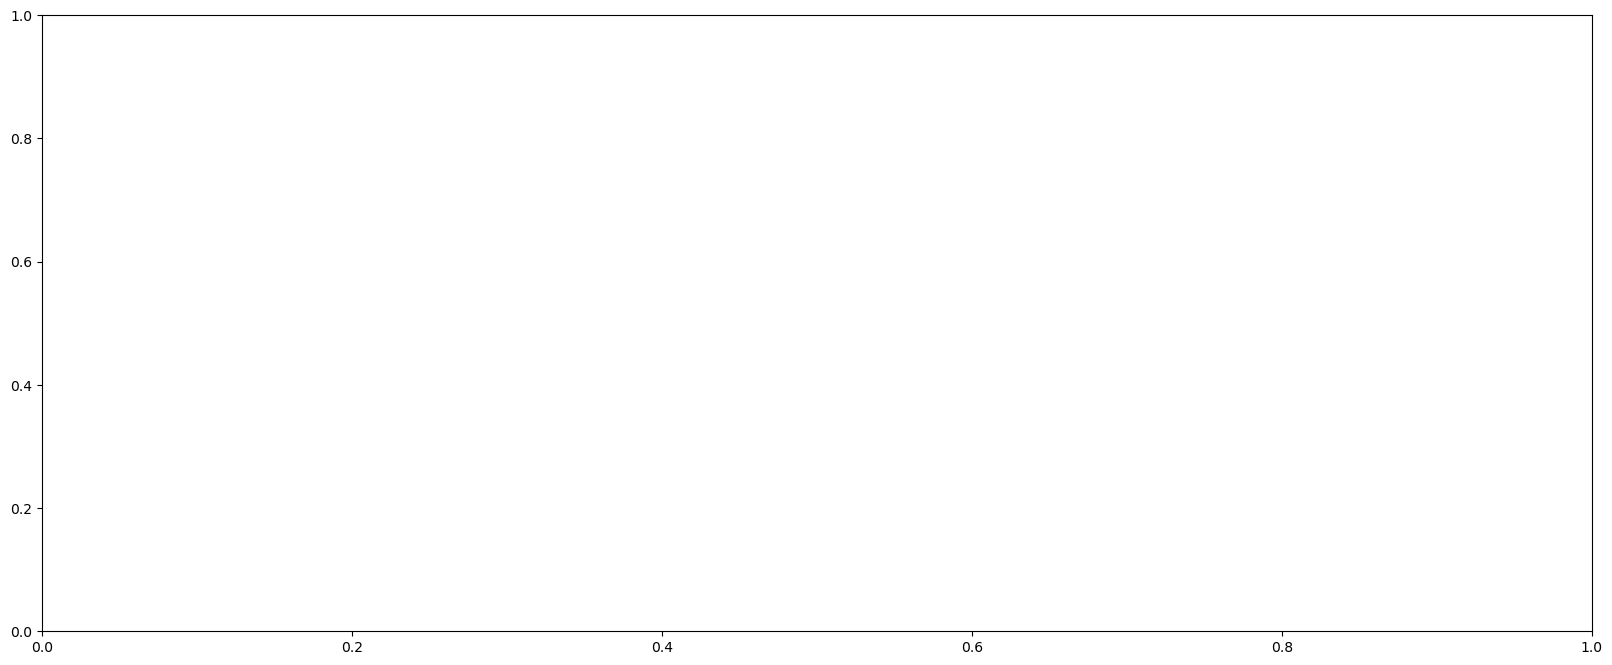

In [38]:
fig, ax = plt.subplots(figsize=(20,8))

for group in grouped:
    for day in group[1]['day'].unique():
        ax.scatter(day, group[1].loc[day,['CO2_Flux']].mean())
    
    
    plt.xticks(rotation=90)
    